<a href="https://colab.research.google.com/github/MammadovN/Machine_Learning/blob/main/projects/02_unsupervised/clustering/customer_segmentation/Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [34]:
import pandas as pd
import numpy as np

# Create a sample dataset
data = {
    'CustomerID': range(1, 301),
    'Age': np.random.randint(18, 70, size=300),
    'AnnualIncome(k$)': np.random.randint(15, 150, size=300),
    'SpendingScore(1-100)': np.random.randint(1, 100, size=300)
}
df = pd.DataFrame(data)

# Display the first 5 observations
display(df.head())

# Data statistics
print("\nData Statistics:")
display(df.describe())

,CustomerID,Age,AnnualIncome(k$),SpendingScore(1-100)
0,1,39,48,31
1,2,38,49,23
2,3,49,120,71
3,4,47,86,95
4,5,25,125,52



Data Statistics:


,CustomerID,Age,AnnualIncome(k$),SpendingScore(1-100)
count,300.000000,300.000000,300.000000,300.000000
mean,150.500000,41.990000,81.886667,49.030000
std,86.746758,14.575942,39.674265,28.456076
min,1.000000,18.000000,16.000000,1.000000
25%,75.750000,29.000000,48.750000,25.000000
50%,150.500000,41.500000,82.000000,50.000000
75%,225.250000,54.000000,118.250000,71.250000
max,300.000000,69.000000,148.000000,99.000000


In [35]:
# Drop the 'CustomerID' column
df = df.drop('CustomerID', axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print("\nExample of Standardized Data:")
display(scaled_df.head())


Example of Standardized Data:


,Age,AnnualIncome(k$),SpendingScore(1-100)
0,-0.205475,-0.855549,-0.634667
1,-0.274196,-0.830302,-0.916272
2,0.481733,0.962261,0.773357
3,0.344291,0.103851,1.618171
4,-1.167567,1.088498,0.104546


In [37]:
from sklearn.cluster import KMeans

# Get the number of clusters from the user
n_clusters = int(input("Enter the optimal number of clusters based on the Elbow graph: "))

# Train the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster results to the original data
df['Cluster'] = clusters

# Cluster statistics
print("\nCluster Statistics:")
display(df.groupby('Cluster').mean())


Enter the optimal number of clusters based on the Elbow graph: 8

Cluster Statistics:


,Age,AnnualIncome(k$),SpendingScore(1-100)
Cluster,,,
0,30.105263,45.710526,30.289474
1,33.773585,124.377358,72.547170
2,58.368421,74.868421,81.131579
3,59.538462,81.730769,20.961538
4,50.714286,125.200000,29.228571
5,32.790698,48.604651,73.209302
6,26.909091,107.333333,15.030303
7,53.647059,36.852941,41.705882


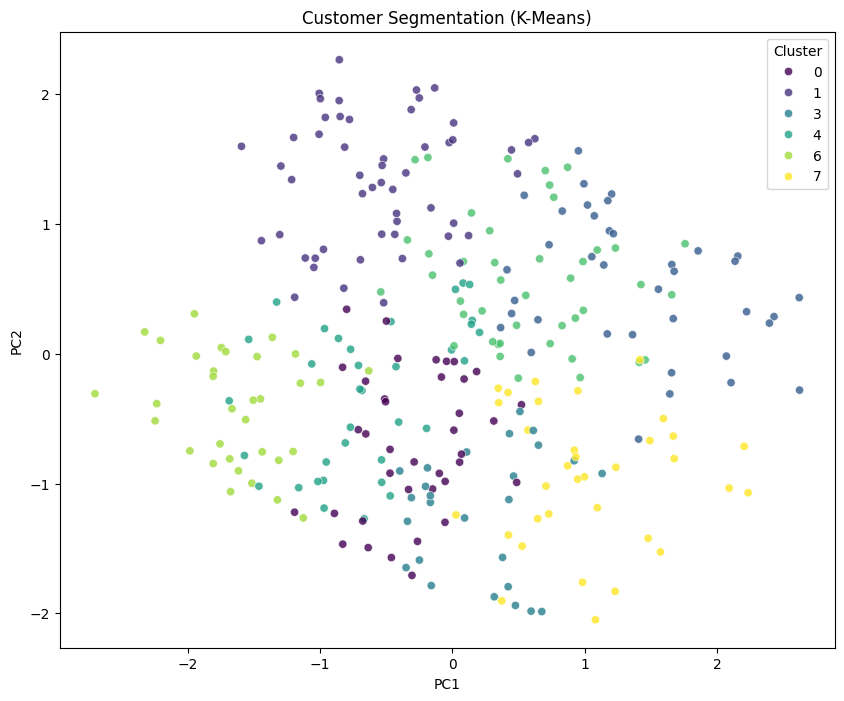

In [38]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Apply PCA to reduce the data to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = clusters

# Visualize the clusters in the 2D PCA space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster',
                palette='viridis', data=principal_df, alpha=0.8)
plt.title('Customer Segmentation (K-Means)')
plt.show()

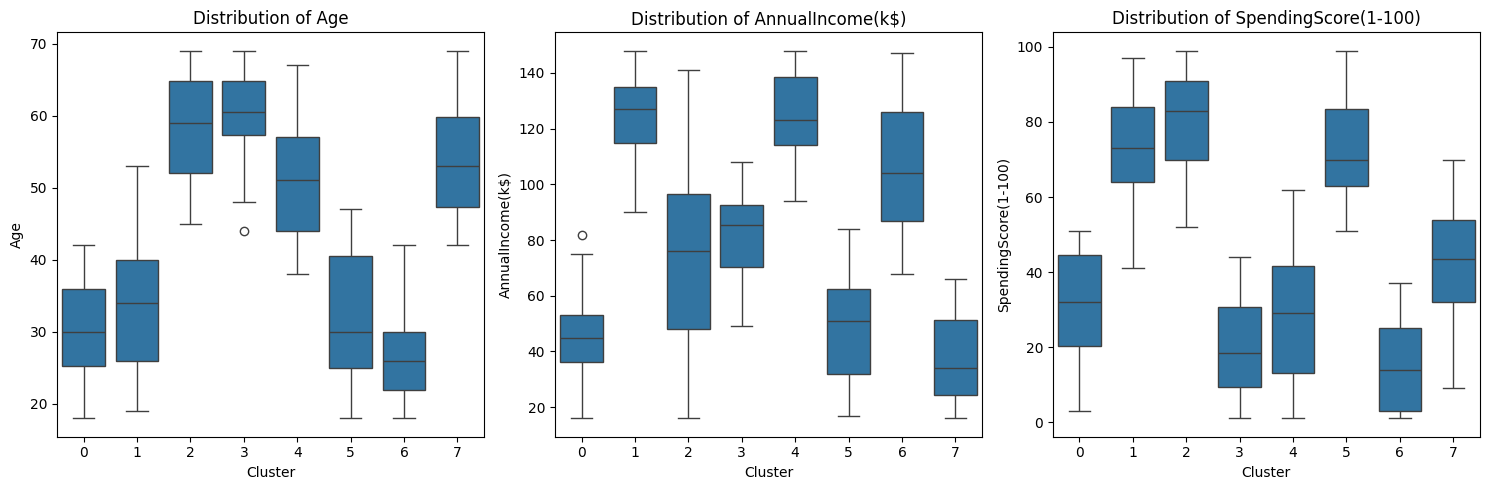

In [39]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'AnnualIncome(k$)', 'SpendingScore(1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

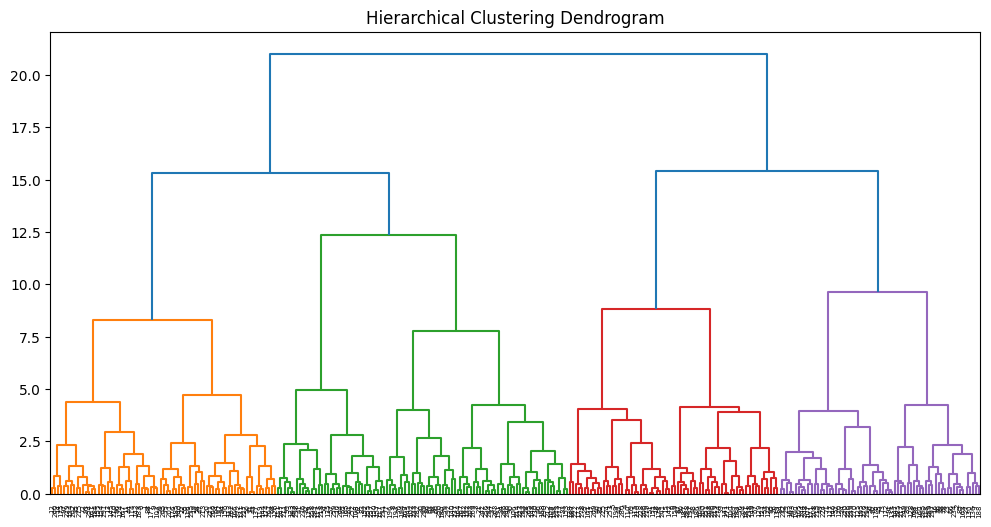

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage(scaled_data, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Model
hierarchical = AgglomerativeClustering(n_clusters=n_clusters,
                                      linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)

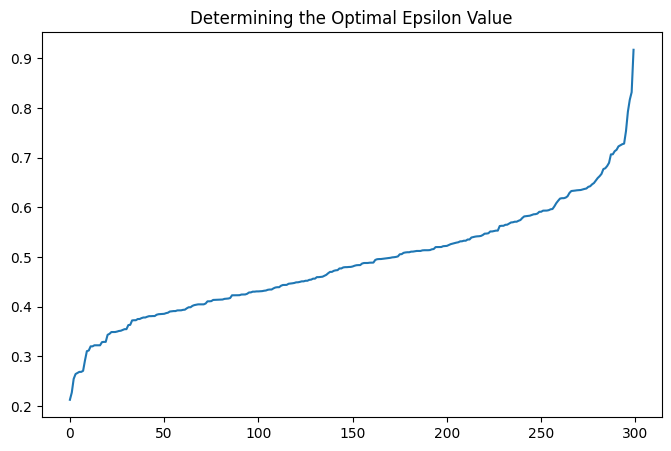

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Find the optimal epsilon value
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(scaled_data)
distances, _ = nbrs.kneighbors(scaled_data)
distances = np.sort(distances[:, 3], axis=0)

# Plot the distance graph to determine the optimal epsilon
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('Determining the Optimal Epsilon Value')
plt.show()

# DBSCAN model (epsilon and min_samples can be taken from the user)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)


In [42]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Define the models and their cluster labels
models = {
    'K-Means': df['Cluster'],
    'Hierarchical': df['Hierarchical_Cluster'],
    'DBSCAN': df['DBSCAN_Cluster']
}

print("\nModel Comparison:")
for name, labels in models.items():
    if len(np.unique(labels)) > 1:  # Score can't be computed if there is only one cluster
        print(f"\n{name}:")
        print(f" - Silhouette: {silhouette_score(scaled_data, labels):.2f}")
        print(f" - Calinski-Harabasz: {calinski_harabasz_score(scaled_data, labels):.2f}")
        print(f" - Number of Clusters: {len(np.unique(labels))}")



Model Comparison:

K-Means:
 - Silhouette: 0.27
 - Calinski-Harabasz: 116.93
 - Number of Clusters: 8

Hierarchical:
 - Silhouette: 0.25
 - Calinski-Harabasz: 110.22
 - Number of Clusters: 8

DBSCAN:
 - Silhouette: -0.05
 - Calinski-Harabasz: 14.78
 - Number of Clusters: 19
